<a href="https://colab.research.google.com/github/Jaomiew/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. ช่วงเช้าหรือช่วงบ่ายมีเครื่องบินขาเข้ามากกว่ากัน

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [1]:
import pandas as pd   #ส่วนของการ Import

In [2]:
from google.colab import drive     # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os   # จัดการไฟล์และ path

In [13]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/flights.csv')   #กำหนด path ของโฟลเดอร์ที่ Data อยู่ 
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [15]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [8]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

### **ตัวอย่างการ run**

In [10]:
gen_exams('623021054-8')

รหัสนักศึกษา 623021054-8 ทำข้อ 2 และ 3


In [21]:
merged_airports= flights.merge (airports,how='left',left_on='รหัสสนามบินต้นทาง',right_on='รหัสสนามบิน')
merged_airports                            #ทำการเชื่อมตาราง 2 ตาราง ได้แก่  1.รหัสสนามบินต้นทาง 2.รหัสสนามบิน 

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,13204,Orlando,FL,Orlando International
2702214,19,6,DL,10397,13495,-2,-3,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702215,19,6,DL,10140,10397,18,9,10140,Albuquerque,NM,Albuquerque International Sunport
2702216,19,6,DL,10397,13244,10,7,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International


In [22]:
merged_airports.isnull() .any()  #.any() คือ จะสรุปข้อมูลเป็นรายคอลัมน์ ว่าเเต่ละคอลัมน์มี missing รึป่าว 

วันในเดือน            False
วันในสัปดาห์          False
สายการบิน             False
รหัสสนามบินต้นทาง     False
รหัสสนามบินปลายทาง    False
ความล่าช้าขาออก       False
ความล่าช้าขาเข้า      False
รหัสสนามบิน           False
เมือง                 False
รัฐ                   False
ชื่อสนามบิน           False
dtype: bool

*False คือ ค่าที่ไม่เป็นช่องว่าง

*True คือ ค่าที่เป็นช่องว่าง

### **ข้อ 2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์**

In [57]:
import numpy as np
from matplotlib import pyplot as plt

In [52]:
merged_airports = flights.groupby('วันในสัปดาห์')[['รหัสสนามบินต้นทาง']].count()   # จัดกลุ่มด้วยรหัสสนามบินต้นทาง
merged_airports

,รหัสสนามบินต้นทาง
วันในสัปดาห์,
1,407837
2,397594
3,403072
4,406563
5,396387
6,318537
7,372228


In [53]:
merged_airports.reset_index(inplace=True)   # reset index เพื่อเอา index ไปใช้งานต่อไปได้
merged_airports

,วันในสัปดาห์,รหัสสนามบินต้นทาง
0,1,407837
1,2,397594
2,3,403072
3,4,406563
4,5,396387
5,6,318537
6,7,372228


No handles with labels found to put in legend.


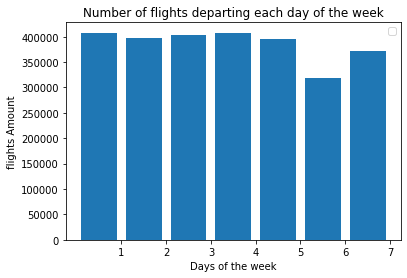

In [59]:
plt.bar(np.arange(len(merged_airports.iloc[:,1])), merged_airports.iloc[:,1])

plt.xlabel('Days of the week') 
plt.ylabel('flights Amount') 
plt.title('Number of flights departing each day of the week') 
plt.xticks(np.arange(len(merged_airports.iloc[:,0]))+0.5, merged_airports.iloc[:,0])
plt.legend();

### **ข้อ 3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด**

In [23]:
merged_airports.groupby('สายการบิน').count()

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
9E,80031,80031,80031,80031,80031,80031,80031,80031,80031,80031
AA,289855,289855,289855,289855,289855,289855,289855,289855,289855,289855
AS,68555,68555,68555,68555,68555,68555,68555,68555,68555,68555
B6,121906,121906,121906,121906,121906,121906,121906,121906,121906,121906
DL,381657,381657,381657,381657,381657,381657,381657,381657,381657,381657
EV,157928,157928,157928,157928,157928,157928,157928,157928,157928,157928
F9,35738,35738,35738,35738,35738,35738,35738,35738,35738,35738
FL,92702,92702,92702,92702,92702,92702,92702,92702,92702,92702
HA,17432,17432,17432,17432,17432,17432,17432,17432,17432,17432


In [24]:
summary = merged_airports.groupby('สายการบิน').count().sort_values(by=['วันในเดือน'],ascending=False)
summary

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
WN,575739,575739,575739,575739,575739,575739,575739,575739,575739,575739
DL,381657,381657,381657,381657,381657,381657,381657,381657,381657,381657
AA,289855,289855,289855,289855,289855,289855,289855,289855,289855,289855
UA,286418,286418,286418,286418,286418,286418,286418,286418,286418,286418
US,233321,233321,233321,233321,233321,233321,233321,233321,233321,233321
OO,160164,160164,160164,160164,160164,160164,160164,160164,160164,160164
EV,157928,157928,157928,157928,157928,157928,157928,157928,157928,157928
B6,121906,121906,121906,121906,121906,121906,121906,121906,121906,121906
MQ,113212,113212,113212,113212,113212,113212,113212,113212,113212,113212


In [27]:
MAX = summary.iloc[:1,:1]    #หาเที่ยวบินที่มากที่สุด
MAX

,วันในเดือน
สายการบิน,
WN,575739


**สายการบิน WN เป็นสายการบินที่มีเที่ยวบินมากที่สุด**

In [28]:
MIN = summary.iloc[15:16,:1]    #หาเที่ยวบินที่น้อยที่สุด
MIN

,วันในเดือน
สายการบิน,
HA,17432


**สายการบิน HA  เป็นสายการบินที่มีเที่ยวบินน้อยที่สุด**

## **คิดโจทย์ขึ้นเอง**

### **เรียงลำดับเมืองที่มีสายการบินขาเข้ามากที่สุด และน้อยที่สุด 5 อันดับแรก**

In [47]:
merged_airports[['รหัสสนามบินปลายทาง','เมือง']] #ดูรหัสสนามบินปลายทางและเมือง

,รหัสสนามบินปลายทาง,เมือง
0,13303,Detroit
1,12478,Salt Lake City
2,14869,Portland
3,11433,St. Louis
4,12892,Cincinnati
...,...,...
2702213,14869,Orlando
2702214,13495,Atlanta
2702215,10397,Albuquerque
2702216,13244,Atlanta


In [49]:
MAX1 = merged_airports.groupby('เมือง').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False) #หาเมืองที่มีขาเข้ามากที่สุด 5 อันดับเเรก
MAX1.iloc[:5,4:5]

,รหัสสนามบินปลายทาง
เมือง,
Chicago,176939
Atlanta,148563
New York,118026
Los Angeles,117714
Dallas/Fort Worth,104270


เมืองที่มีขาเข้ามากที่สุด 5 อันดับเเรก ได้แก่
1. Chicago
2. Atlanta
3. New York
4. Los Angeles
5. Dallas/Fort Worth	 

In [51]:
MIN1 = merged_airports.groupby('เมือง').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=True) #หาเมืองที่มีขาเข้าน้อยที่สุด 5 อันดับเเรก
MIN1.iloc[:5,4:5]

,รหัสสนามบินปลายทาง
เมือง,
Anchorage,7700
Long Beach,8166
Providence,9313
Norfolk,10006
West Palm Beach/Palm Beach,10091


เมืองที่มีขาเข้าน้อยที่สุด 5 อันดับเเรก ได้แก่
1. Anchorage
2. Long Beach
3. Providence
4. Norfolk
5. West Palm Beach/Palm Beach	